<a href="https://colab.research.google.com/github/Carlosrbrj/Ironmandataset/blob/main/Ironproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IronProject

Esse projeto de dados tem como objetivo de criar uma análise exploratória do dataset construído por Tim Metzger e disponibilizado em seu repositório Github. Sendo assim, esse dataset reúne os resultados das provas 70.3 de 2017 a 2021, incluindo o tempo de conclusão de cada modalidade, além do tempo final de conclusão.

**As informações sobre os atributos:**


1.   Place - colocação geral na prova
2.   Name - nome do atleta
3.   BIb
4.   Division - divisão levando em consideração a idade, gênero e classificação amadora/profissional
5.   Nation - País
6.   Swim - tempo de conclusão da natação
7.   Bike - Tempo de coonclusão da prova de bicicleta
8.   Run - tempo de conclusão da 1/2 maratona
9.   Time - tempo final de conclusão da prova
10.  Race - prova disputada
11.  Date - Data da prova
12.  Location - Local
13.  Country - País
14.  City - Cidade

Com isso, o objetivo final dessa análise é identificar quais são os atributos mais relevantes para determinar o tempo final da prova, além de criar um modelo de ML capaz de prever o tempo final com base nas parciais de cada modalidade.

# 1. Análise Exploratória de Dados

Para dar início a análise exploratória de dados, o bloco de código abaixo importa todos os pacotes que irei usar nesse projeto, além de desativar as notificações de "warnings".

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

## 2.1 - Carga de dados

O código abaixo carrega a base de dados disponível em um repositório público do Github.

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/timMetzger/IronmanDataAnalysis/master/cleaned_data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

In [3]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Unnamed: 0,Place,Name,Bib,Division,Nation,Swim,Bike,Run,Time,Race,Date,Location,Country,City
0,0,1,Tomas Andres Rodriguez Hernandez,1221,MPRO,MEX,24.133333,133.166667,75.716667,238.083333,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
1,1,1,Eduardo Perez Sandi,53,M18-24,MEX,26.216667,141.616667,82.216667,253.183333,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
2,2,1,Eduardo Elias Moreno Castaneda,1134,M25-29,MEX,24.850000,142.200000,82.616667,253.283333,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
3,3,1,Alberto Balderas Femat,816,M35-39,MEX,23.850000,140.233333,86.733333,255.583333,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
4,4,1,Roberto Ramses Cambray Rodriguez,718,M30-34,MEX,26.100000,152.616667,82.050000,265.516667,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
5,5,1,Manuel Lozano,62,M40-44,MEX,27.166667,139.716667,93.550000,265.800000,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
6,6,2,Leoncio Sanchez,59,M35-39,MEX,28.050000,145.150000,89.633333,267.516667,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
7,7,2,Javier Zafra De Ita,758,M30-34,MEX,29.483333,146.133333,88.850000,269.416667,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
8,8,3,Juan Manuel Aguilar Bustillos,111,M30-34,MEX,31.366667,146.266667,87.983333,269.450000,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco
9,9,1,Alina Hanschke Busch,66,F35-39,MEX,30.583333,152.316667,81.866667,269.516667,Ironman 70.3 Acapulco,05/23/2021,"Acapulco, Mexico",MX,Acapulco


## 2.2 Análise Descritiva

Uma vez carregado o dataset, vamos entender quais são suas características de construção, como sua dimensão e informações.

In [4]:
# Mostra as dimensões do dataset
dataset.shape

(451565, 15)

In [5]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451565 entries, 0 to 451564
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  451565 non-null  int64  
 1   Place       451565 non-null  object 
 2   Name        451565 non-null  object 
 3   Bib         451565 non-null  int64  
 4   Division    451564 non-null  object 
 5   Nation      448321 non-null  object 
 6   Swim        451565 non-null  float64
 7   Bike        451565 non-null  float64
 8   Run         451565 non-null  float64
 9   Time        438683 non-null  float64
 10  Race        451565 non-null  object 
 11  Date        451565 non-null  object 
 12  Location    451565 non-null  object 
 13  Country     451565 non-null  object 
 14  City        451565 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 51.7+ MB


Com base na característica do Dataset, podemos observar que será necessário construir um segundo dataset excluindo as variáveis que não são do tipo Float para a construção do modelo de ML. No entanto, os passos seguintes trazem alguns insigths dessa base original.

In [6]:
# Contando a quantidade de ocorrências de cada país
country_distribution = dataset.groupby('Nation').size()

# Ordenando do maior para o menor
country_distribution_sorted = country_distribution.sort_values(ascending=False)

# Exibindo a distribuição ordenada
print(country_distribution_sorted)

Nation
USA                138123
GBR                 24506
CAN                 22837
FRA                 17227
Australia           17100
                    ...  
SEY                     1
GT                      1
SGP (Singapore)         1
SGS                     1
#N/                     1
Length: 669, dtype: int64


A tabela indica que existem muito mais atletas competindo nesse dataset quando comparado aos outros países.

In [7]:
# Contando a quantidade de atletas por divisão
Division_distribution = dataset.groupby('Division').size()

# Ordenando do maior para o menor
Division_distribution_sorted = Division_distribution.sort_values(ascending=False)

# Exibindo a distribuição ordenada
print(Division_distribution_sorted)

Division
M40-44                41101
M35-39                40993
M45-49                35542
M30-34                33725
M50-54                24424
                      ...  
M CLYDESDALEOVER40        1
MMIXEDTEAM                1
F D55-59                  1
F D70-74                  1
                          1
Length: 273, dtype: int64


Com base nisso, identificamos que a maior parte dos atletas que competiram nessas provas estavam na categoria de M40-44. Agora, vamos ver o tempo médio de conclusão de prova por categoria.

In [8]:
# Calculando o tempo médio de conclusão por divisão
average_time_by_division = dataset.groupby('Division')['Time'].mean()

# Ordenando do maior para o menor
average_time_by_division_sorted = average_time_by_division.sort_values(ascending=True)

# Exibindo a média de tempo de conclusão ordenada por divisão
print(average_time_by_division_sorted)


Division
U NOAGE               192.454167
MPro                  238.983333
M-PRO                 241.413131
M PRO                 243.655919
AK MPRO               248.376577
                         ...    
M CLYDESDALEOVER40    480.083333
M80-84                485.969608
AK W70-74             486.611111
M 80-84               501.750000
F D70-74              512.566667
Name: Time, Length: 273, dtype: float64


Como esperado, o tempo médio de conclusão da prova dos Profissionais é menor quando comparado aos outros amadores.

Agora, vamos encontrar a prova mais rápida do Dataset.

In [9]:
# Calculando o tempo médio de conclusão por divisão
average_time_by_race = dataset.groupby('Race')['Time'].mean()

# Ordenando do maior para o menor
average_time_by_race_sorted = average_time_by_race.sort_values(ascending=True)

# Exibindo a média de tempo de conclusão ordenada por divisão
print(average_time_by_race_sorted)


Race
Ironman 70.3 Santa Rosa              0.000000
Ironman 70.3 Lanzarote             183.662824
Ironman 70.3 Des Moines            288.155251
Ironman 70.3 Pula                  309.097147
Ironman 70.3 WC Chattanooga Men    314.590850
                                      ...    
Ironman 70.3 Subic Bay             414.033140
Ironman 70.3 Goa                   436.111438
Ironman 70.3 Augusta               623.331720
Ironman 70.3 Racine                       NaN
Ironman 70.3 Xi'an                        NaN
Name: Time, Length: 148, dtype: float64


O código abaixo mostra que a prova mais rápida do Dataset foi o Ironman 70.3 Lanzarote.

## 2.3 Estatísticas Descritivas

Vamos analisar as estatísticas descritivas desse dataset.

In [40]:
# Obtendo as estatísticas descritivas
dataset.describe()

,Unnamed: 0,Bib,Swim,Bike,Run,Time
count,451565.000000,451565.000000,451565.000000,451565.000000,451565.000000,438683.000000
mean,225784.708020,1202.975239,42.582350,178.946417,135.884550,363.425568
std,130358.113162,859.697738,24.210476,37.494763,59.526193,83.397885
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,112892.000000,520.000000,33.900000,161.400000,109.433333,319.516667
50%,225783.000000,1041.000000,39.150000,177.533333,126.566667,355.933333
75%,338680.000000,1717.000000,45.266667,196.683333,149.266667,399.283333
max,451571.000000,5074.000000,1434.733333,1434.866667,1438.950000,1217.900000


A análise descritiva do Dataset é capaz de nos entregar bons insights, por exemplo:

- O tempo médio de conclusão de uma prova de Ironman 70.3 é de 363.42 minutos (6h).
- A Natação, em média leva 42.52 minutos para completar os 1.800 metros. (2,36 minutos a cada 100m);
- Na Bike, o tempo médio de conclusão são de 178,94 minutos para completar os 90 km;
- Na corrida, o tempo médio de conclusão da meia maratona são de 135,88 minutos. (Pace méido de 6,47 minutos por km).

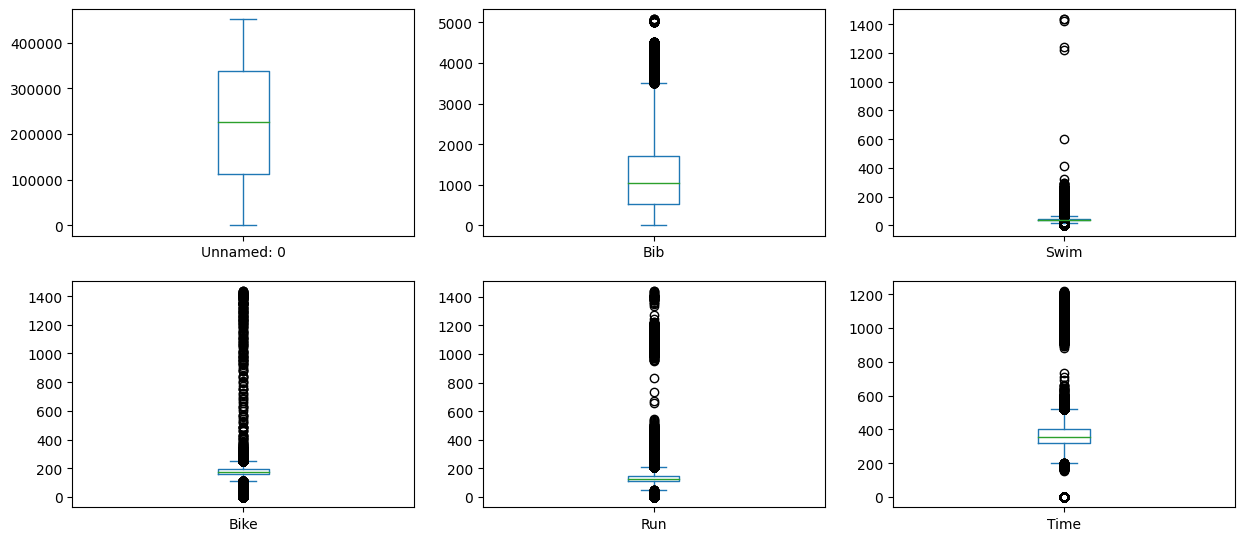

In [11]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

## 2.5 Visualizações Multimodais

A análise das visualizações multimodais permite entender como os atributos interagem entre si. Para isso, iremos verificar a covariância entre as variáveis númericas do dataset a partir do coeficiente de correlação de Pearson atráves da matriz de correlação, que segue a seguinte lógica:

- Próximo de -1 - Há uma correlação negativa entre as variáveis;

- Próximo a +1 - Existe uma correlçaõ positiva entre as variáveis;

- 0: Não existe correlação entre as variávies.

Para iniciar as visualizações multimodais, vamos converter criar um novo dataset somente com variáveis do tipo float.

In [12]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
DatasetVM = dataset[col[:]]

In [13]:
# Mostrando os nomes dos atributos (colunas)
print(dataset.columns)

Index(['Unnamed: 0', 'Place', 'Name', 'Bib', 'Division', 'Nation', 'Swim',
       'Bike', 'Run', 'Time', 'Race', 'Date', 'Location', 'Country', 'City'],
      dtype='object')


In [14]:
# Removendo os atributos
DatasetVM.drop(['Unnamed: 0', 'Name','Bib', 'Division', 'Nation', 'Race', 'Location', 'Country', 'City', 'Date', 'Place'], axis=1, inplace= True)

# Exbindo as primeiras linhas do novo DatasetVM

DatasetVM.head(10)

,Swim,Bike,Run,Time
0,24.133333,133.166667,75.716667,238.083333
1,26.216667,141.616667,82.216667,253.183333
2,24.850000,142.200000,82.616667,253.283333
3,23.850000,140.233333,86.733333,255.583333
4,26.100000,152.616667,82.050000,265.516667
5,27.166667,139.716667,93.550000,265.800000
6,28.050000,145.150000,89.633333,267.516667
7,29.483333,146.133333,88.850000,269.416667
8,31.366667,146.266667,87.983333,269.450000
9,30.583333,152.316667,81.866667,269.516667


In [15]:
# Converter as colunas 'Swim', 'Bike', 'Run' e 'Time' de string para float
DatasetVM['Swim'] = dataset['Swim'].astype(float)
DatasetVM['Bike'] = dataset['Bike'].astype(float)
DatasetVM['Run'] = dataset['Run'].astype(float)
DatasetVM['Time'] = dataset['Time'].astype(float)

# Verificar a conversão
print(DatasetVM.dtypes)

Swim    float64
Bike    float64
Run     float64
Time    float64
dtype: object


In [16]:
# Exbindo as primeiras linhas do novo DatasetVM

DatasetVM.head(10)

,Swim,Bike,Run,Time
0,24.133333,133.166667,75.716667,238.083333
1,26.216667,141.616667,82.216667,253.183333
2,24.850000,142.200000,82.616667,253.283333
3,23.850000,140.233333,86.733333,255.583333
4,26.100000,152.616667,82.050000,265.516667
5,27.166667,139.716667,93.550000,265.800000
6,28.050000,145.150000,89.633333,267.516667
7,29.483333,146.133333,88.850000,269.416667
8,31.366667,146.266667,87.983333,269.450000
9,30.583333,152.316667,81.866667,269.516667


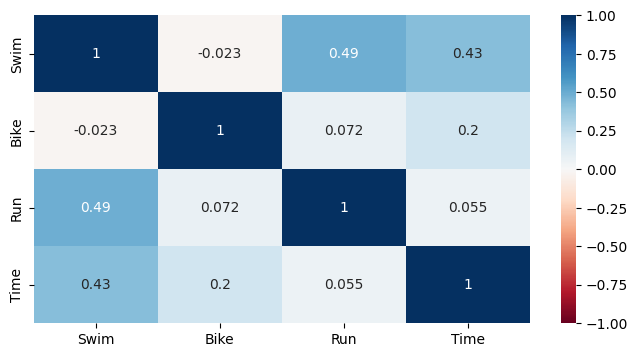

In [17]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(DatasetVM.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

De maneira geral, o resultado surpreende. Podemos observar que a Correlação entre Swim e Time é a mais forte, sugerindo que, geralmente, quanto maior o tempo de natação, maior é o tempo total. Ainda, a Bike tem uma influência positiva no tempo final, mas não tão forte quanto à natação, no entanto, a corrida parece não interferir tanto no tempo final da prova.

Algumas conclusões:
* Reduzir o tempo de natação (Swim) pode ter um impacto mais significativo na melhoria do tempo total devido à correlação positiva moderada (0.43).
* Reduzir o tempo de ciclismo (Bike) pode ter algum impacto, mas não tão significativo quanto a natação.
* Reduzir o tempo de corrida (Run) pode não resultar em uma melhoria significativa do tempo total, dada a correlação muito fraca.

# Visualização de Dados simples

Nessa etapa, iremos criar algumas visualizações de dados para entender um pouco melhor o comportamento do Dataset.
Com isso, começarei criando novos datasets de divisão e nacionalidade.

In [18]:
#criando um novo dataset com as principais nacionalidades

df_top5=dataset[(dataset['Nation']=='USA')|
                  (dataset['Nation']=='GBR')|
                  (dataset['Nation']=='CAN')|
                  (dataset['Nation']=='FRA')|
                  (dataset['Nation']=='Australia')|
                  (dataset['Nation']== 'BR')]

O bloco de código abaixo cria uma visualização da quantidade de ocorrências por nacionalidade.

Nation
USA          138123
GBR           24506
CAN           22837
FRA           17227
Australia     17100
BR               88
Name: count, dtype: int64


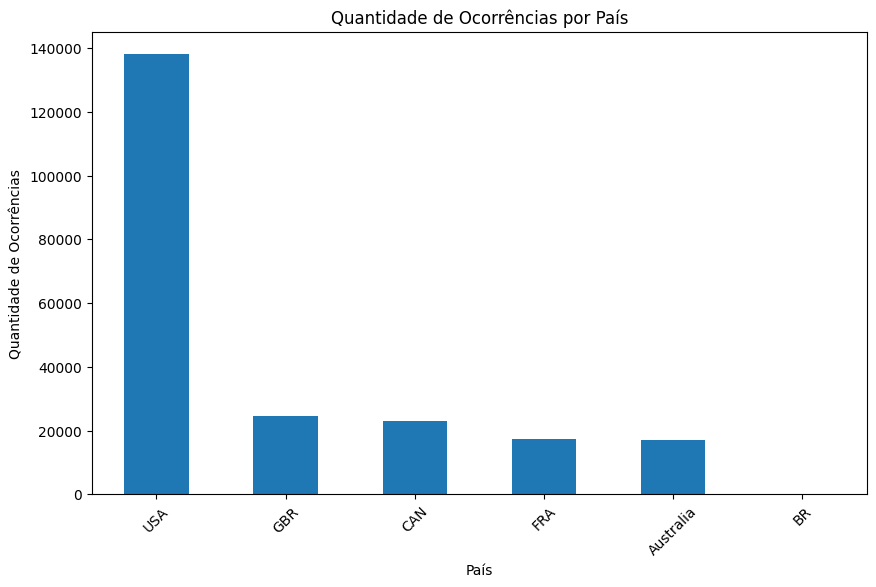

In [19]:
# Contando a quantidade de ocorrências em cada país
Nation_distribution = df_top5['Nation'].value_counts()

# Ordenando do maior para o menor
Nation_distribution_sorted = Nation_distribution.sort_values(ascending=False)

# Exibindo a distribuição ordenada
print(Nation_distribution_sorted)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
Nation_distribution.plot(kind='bar')
plt.title('Quantidade de Ocorrências por País')
plt.xlabel('País')
plt.ylabel('Quantidade de Ocorrências')
plt.xticks(rotation=45)
plt.show()

Nation
BR           315.399053
FRA          341.355226
Australia    342.043584
GBR          360.824677
CAN          360.898769
USA          383.825677
Name: Time, dtype: float64


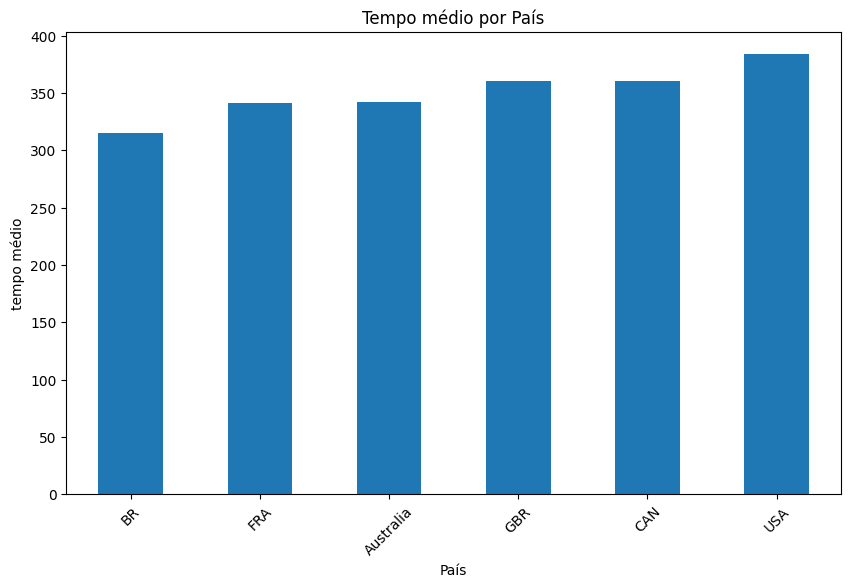

In [20]:
# Calculando o tempo médio de conclusão por divisão
average_time_by_nation = df_top5.groupby('Nation')['Time'].mean()

# Ordenando do maior para o menor
average_time_by_nation_sorted = average_time_by_nation.sort_values(ascending=True)

# Exibindo a média de tempo de conclusão ordenada por divisão
print(average_time_by_nation_sorted)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
average_time_by_nation_sorted.plot(kind='bar')
plt.title('Tempo médio por País')
plt.xlabel('País')
plt.ylabel('tempo médio')
plt.xticks(rotation=45)
plt.show()

Para completar a análise, criaremos um segundo dataset derivado do df_top5 que reúne apenas as principais divisões em número de atletas. São elas:

* M40-44
* M35-39
* M45-49
* M30-34
* M50-54

In [21]:
#criando um novo dataset com as divisões

df_Dvision=df_top5[(df_top5['Division']=='M40-44')|
                  (df_top5['Division']=='M35-39')|
                  (df_top5['Division']=='M45-49')|
                  (df_top5['Division']=='M30-34')|
                  (df_top5['Division']=='M50-54')]

Division
M40-44    18091
M45-49    18001
M35-39    17073
M30-34    14852
M50-54    14141
dtype: int64


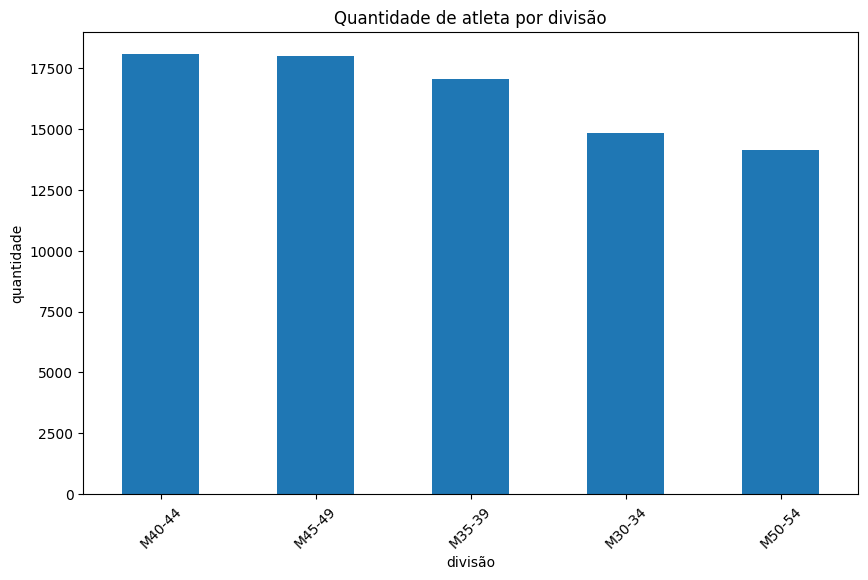

In [22]:
# Contando a quantidade de atletas por divisão
DF_distribution = df_Dvision.groupby('Division').size()

# Ordenando do maior para o menor
DF_distribution_sorted = DF_distribution.sort_values(ascending=False)

# Exibindo a distribuição ordenada
print(DF_distribution_sorted)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
DF_distribution_sorted.plot(kind='bar')
plt.title('Quantidade de atleta por divisão')
plt.xlabel('divisão')
plt.ylabel('quantidade')
plt.xticks(rotation=45)
plt.show()

Division
M30-34    356.244746
M35-39    357.354981
M40-44    362.753195
M45-49    370.421504
M50-54    376.273971
Name: Time, dtype: float64


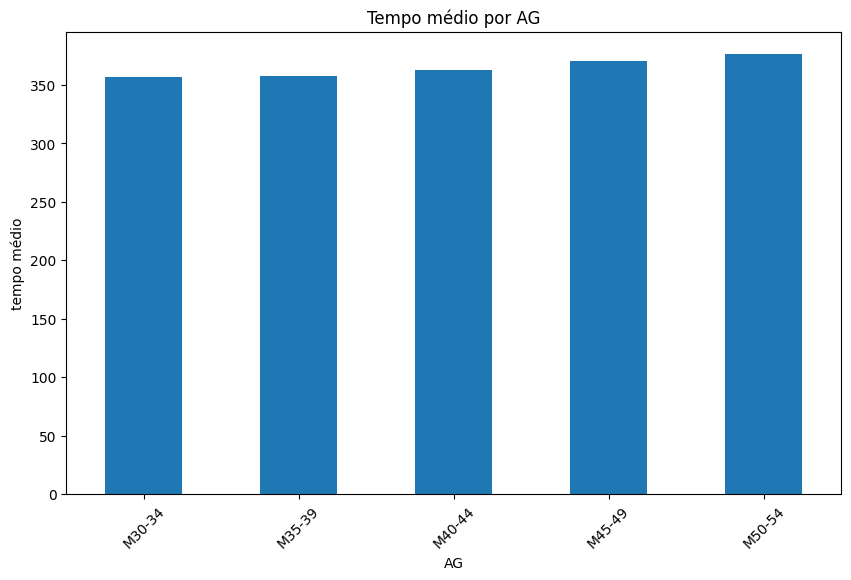

In [23]:
# Calculando o tempo médio de conclusão por divisão
average_time_by_dvisionDF = df_Dvision.groupby('Division')['Time'].mean()

# Ordenando do maior para o menor
average_time_by_dvisionDF_sorted = average_time_by_dvisionDF.sort_values(ascending=True)

# Exibindo a média de tempo de conclusão ordenada por divisão
print(average_time_by_dvisionDF_sorted)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
average_time_by_dvisionDF_sorted.plot(kind='bar')
plt.title('Tempo médio por AG')
plt.xlabel('AG')
plt.ylabel('tempo médio')
plt.xticks(rotation=45)
plt.show()

# 3. Pré-processamento de dados

Nessa etapa, o nosso objetivo é preparar o dataset que iremos usar para construir o modelo de ML.
Sendo assim, vamos criar um dataset sem missings.

Como já observamos nas análises anteriores, o dataset possuem alguns missings aparentes que precisam ser tratados. O código abaixo exibe a quantidade de valores faltantes em cada atributo do dataset.

In [24]:
# verificando nulls no dataset
DatasetVM.isnull().sum()

Swim        0
Bike        0
Run         0
Time    12882
dtype: int64

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, para uma melhor visualização da proporção de dados faltantes em cada atributo, o código abaixo também exibe uma visualização matricial dessa nulidade.

<Axes: >

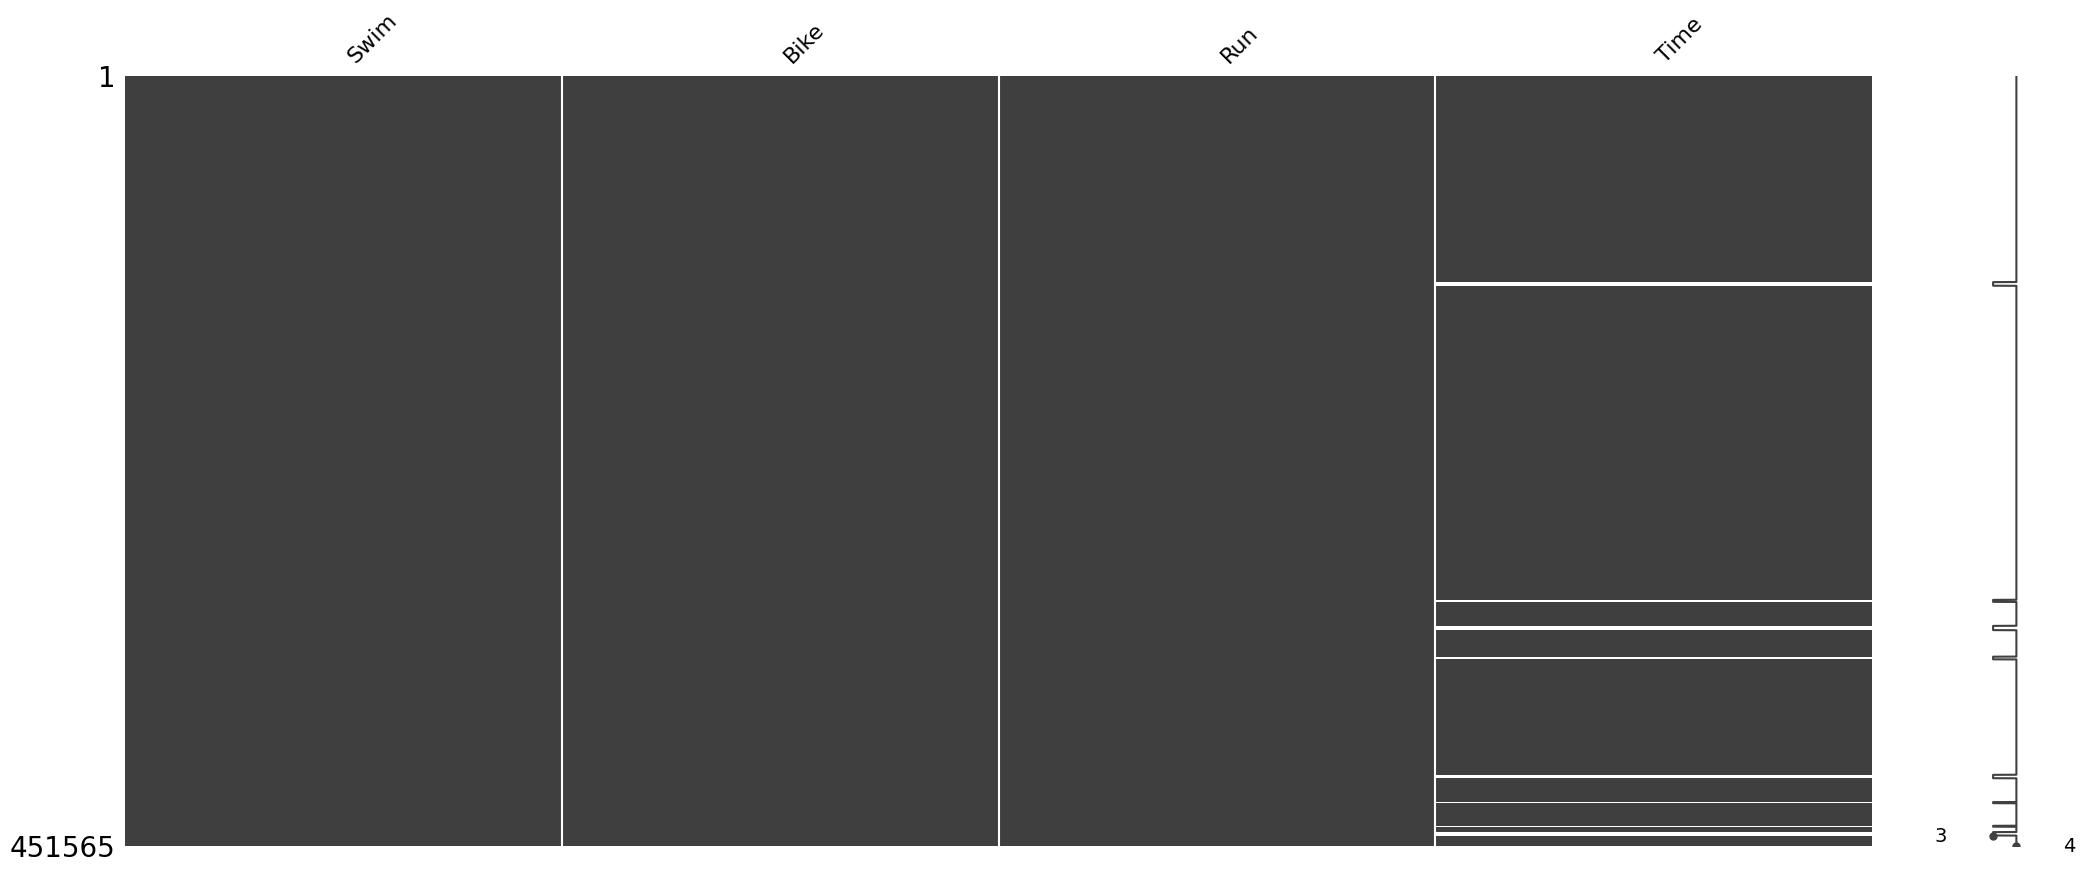

In [25]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(DatasetVM.columns)

# o novo dataset irá conter todas as colunas
datasetSM = DatasetVM[col[:]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSM)

a parir da visualização acima, podemos observar que existem alguns valores de Time que estão Nulo. Sendo assim, para completar essas lacunas, iremos substituir os NaN por pela mediana da coluna.

<Axes: >

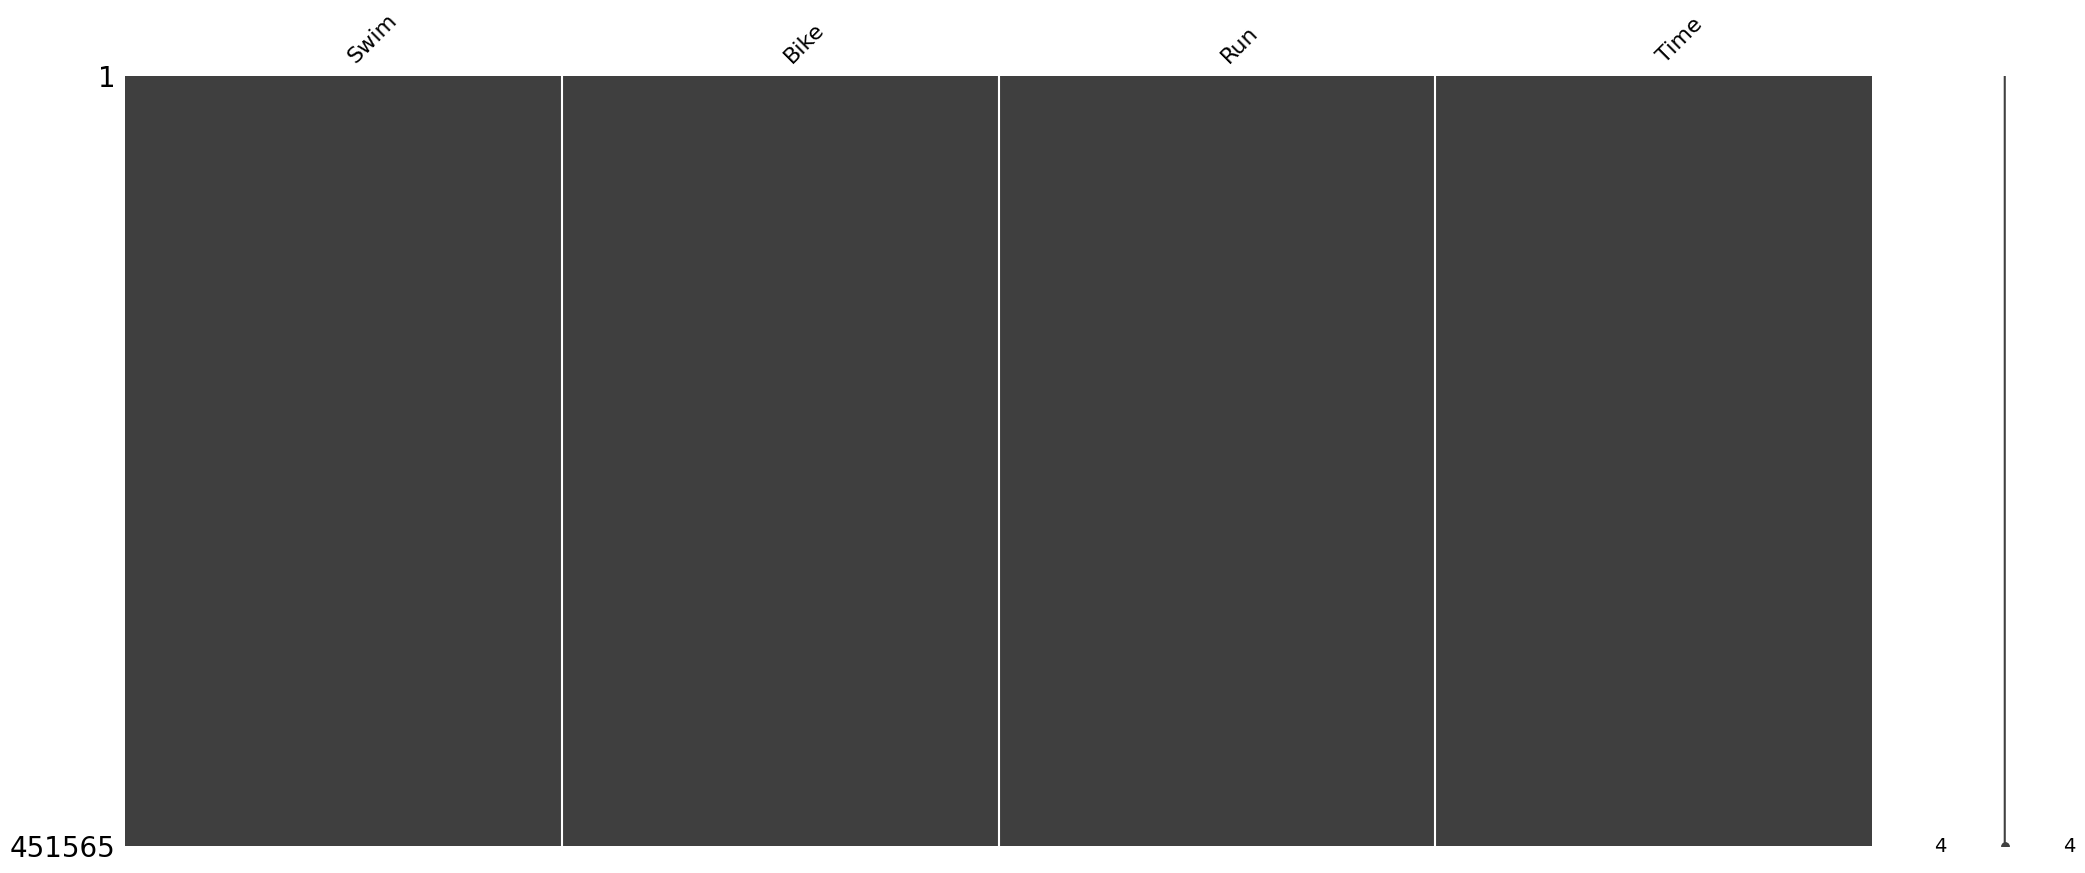

In [26]:
# substituindo os NaN de 'Wall21' pela mediana da coluna
datasetSM['Time'].fillna(datasetSM['Time'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSM)

In [27]:
# Guardando o novo dataset para testes futuros
datasetSM = datasetSM
# exibindo as primeiras linhas
datasetSM.head()

,Swim,Bike,Run,Time
0,24.133333,133.166667,75.716667,238.083333
1,26.216667,141.616667,82.216667,253.183333
2,24.850000,142.200000,82.616667,253.283333
3,23.850000,140.233333,86.733333,255.583333
4,26.100000,152.616667,82.050000,265.516667


##3.1 Análise descritiva - Novo dataset

Agora, depois das transformações de dados necessárias, faremos de novo a análise descritiva desse dataset para observar se algo mudou.

In [28]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
datasetSM.describe()

,Swim,Bike,Run,Time
count,451565.000000,451565.000000,451565.000000,451565.000000
mean,42.582350,178.946417,135.884550,363.211834
std,24.210476,37.494763,59.526193,82.209173
min,0.000000,0.000000,0.000000,0.000000
25%,33.900000,161.400000,109.433333,320.666667
50%,39.150000,177.533333,126.566667,355.933333
75%,45.266667,196.683333,149.266667,397.700000
max,1434.733333,1434.866667,1438.950000,1217.900000


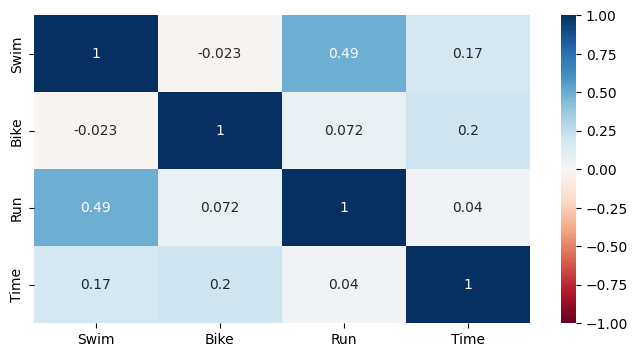

In [29]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(datasetSM.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

A partir do gráfico acima, podemos observar que as transformações de dados mudaram drasticamente as relações entre os atributos. Agora, podemos observar que a Natação não é mais o esporte que mais influencia no resultado final, mas sim a bicicleta. No entanto, de forma geral, os atributos desse dataset parecem ser pouco correlacionados com o tempo final. No entanto, podemos concluir que:

* Natação e Ciclismo: Ambos os esportes têm correlações fracas com o tempo total. Apesar disso, melhorias nesses esportes ainda podem ajudar a reduzir o tempo total, mas o impacto não será grande. Priorize o esporte que for mais fácil ou onde for possível obter melhorias mais rapidamente.

* Corrida: O tempo de corrida tem a correlação mais fraca com o tempo total, sugerindo que otimizações na corrida terão um impacto muito limitado no tempo total.

#4. Modelos de Machine Learning

Nessa seção, nosso objetivo é construir um modelo de aprendizado de máquina supervisionado que tem como objetivo criar predições do tempo final de conclusão de um IronMan com base nas parciais de cada modalidade.
Para isso, dividimos esse seção em três partes:

1. Seleção das variáveis indepedentes (modelos de Feature selection) e construção do Dataset
2. Modalagem - selecionaremos os melhores modelos de ML
3. Inferência e apresentação de resultados

## 4.1 Modelos de Feature Selection

Agora, com o objetivo de determinar quais são as variáveis mais relevantes para explicar as variações no modelo, o código abaixo prepara os dados separando a base em Treino e testes.

In [30]:
# Verificar as colunas e suas posições atuais
print("Colunas antes da mudança:")
print(datasetSM.columns)

Colunas antes da mudança:
Index(['Swim', 'Bike', 'Run', 'Time'], dtype='object')


In [31]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = datasetSM.values
X = array[:,0:2] # atributos
y = array[:,2] # target

In [32]:
#importanto pacotes necessários

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k='all')

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", datasetSM.columns[0:2])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=datasetSM.columns[0:2]))


Número original de atributos: 2

Número reduzido de atributos: 2

Atributos Originais: Index(['Swim', 'Bike'], dtype='object')

Scores dos Atributos Originais: [113.726  21.865]

Atributos Selecionados: ['Swim' 'Bike']


A partir da análise de componentes principais acima, podemos concluir que, de fato, o tempo da corrida não explica variações no tempo final de prova. Com isso, para completar o modelo, usaremos dois datasets distintos, sendo o primeiro com todos os atributos e o segundo sem o atributo 'Run'.

#4.2 Modelagem

Nessa seção iremos criar o dataset que usaremos no modelo de ML. Sendo assim, usaremos a conclusões da seção anterior. Depois, iremos dividir essa base de dados em treino e teste e, por fim, identificar o melhor melhor algoritmo de previsão.

#4.2.1 - Modelos Simples de ML

Aqui, iremos usar os algoritmos mais simples de ML e avaliar seus resultados.

In [34]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

In [35]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = datasetSM.values
X = array[:,0:2] # atributos
y = array[:,2] # (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 2652.47 (165.55) - RMSE 51.50
Ridge: MSE 2652.47 (165.55) - RMSE 51.50
Lasso: MSE 2652.48 (165.53) - RMSE 51.50
KNN: MSE 737.18 (72.33) - RMSE 27.15
CART: MSE 1262.58 (78.22) - RMSE 35.53


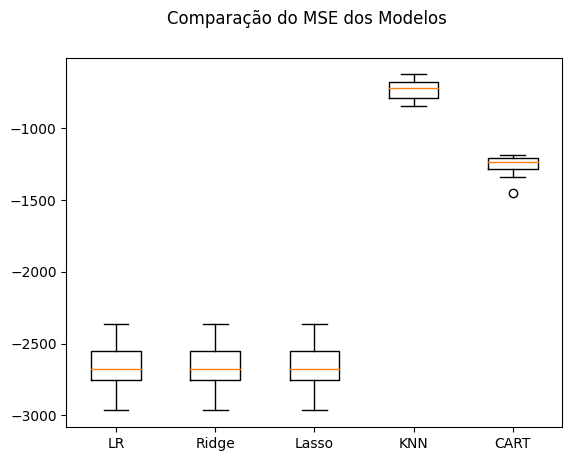

In [36]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Primeiras Conclusões**

De forma geral, o modelo que apresenta melhor resultado é aquele que gera o menor MSE e, consequentemente, o menor RMSE. Portanto, podmeos concluir que o melhor algortmo para esse modelo é o KNN.
O código abaixo cria o modelo usando esse algoritmo e todo conjunto de treino disponível. Além disso, exibe o MSE e RMSE encontrado nos resultados.

In [37]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 720.44
RMSE 26.84


O bloco de código abaixo cria uma visualização dos valores preditos e observados para fins de comparação.

MSE 720.44
RMSE 26.84


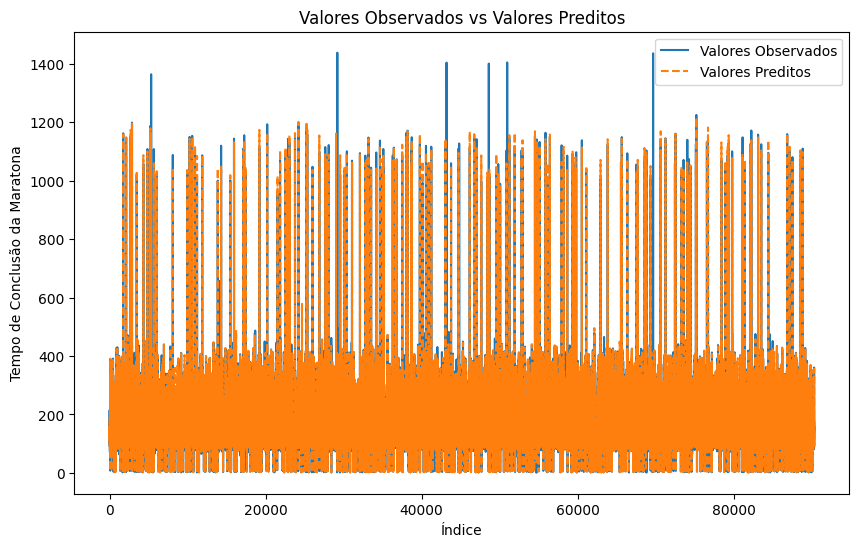

MSE 720.44
RMSE 26.84


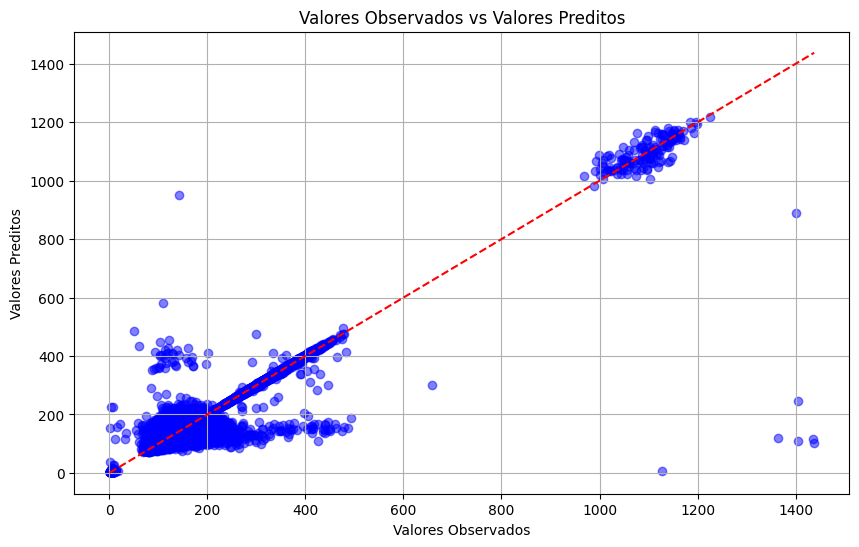

In [38]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Criando um modelo com todo o conjunto de treino
model = KNeighborsRegressor()
model.fit(X_train, y_train)
# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

# Criando o gráfico comparativo
plt.figure(figsize=(10, 6))

# Convert y3_test to a two-dimensional array
y_test = y_test.reshape(-1, 1)

plt.plot(y_test, label='Valores Observados')
plt.plot(predictions, label='Valores Preditos', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('Tempo de Conclusão da Maratona')
plt.title('Valores Observados vs Valores Preditos')
plt.legend()
plt.show()


# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(mse))

# Criando o gráfico dos valores observados vs valores preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.title('Valores Observados vs Valores Preditos')
plt.grid(True)
plt.show()

A partir desse gráfico, podemos observar que o modelo gera previsões razoáveis.

# 4.2.2 Modelos de Machine Learning avançados


Agora, vamos testar algoritmos mais robustos e entender a sua performance.

In [39]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Import the necessary modules for regression models
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
# Criando os modelos e adicionando-os na lista de modelos
# Use regression models instead of classification models
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
# GaussianNB is not suitable for regression, consider other models like SVR
models.append(('SVR', SVR()))


# Use a regression model as the base estimator
base = DecisionTreeRegressor()
num_trees = 100
max_features = 3


# Use regression models for VotingClassifier
bases = []
# Consider using a different regression model instead of LogisticRegression
model1 = LinearRegression()
bases.append(('linear', model1))
model2 = DecisionTreeRegressor()
bases.append(('cart', model2))


# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingRegressor(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestRegressor(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesRegressor(n_estimators=num_trees, max_features=max_features)))
# AdaBoostRegressor and GradientBoostingRegressor are for regression
models.append(('Ada', AdaBoostRegressor(n_estimators=num_trees)))
models.append(('GB', GradientBoostingRegressor(n_estimators=num_trees)))
models.append(('Voting', VotingRegressor(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Definindo a métrica de avaliação
# Use a regression metric like mean squared error
scoring = 'neg_mean_squared_error'

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: -2652.472697 (165.550512)
Ridge: -2652.472697 (165.550513)
Lasso: -2652.475253 (165.527352)
KNN: -737.177999 (72.332559)
CART: -1265.597389 (77.887408)
LR: -2652.472697 (165.550512)
KNN: -737.177999 (72.332559)
CART: -1260.805829 (76.359995)
